# Assignment 5
<img src="https://troypress.com/wp-content/uploads/2022/10/dave-photoz-BDIFIT1ILDs-unsplash-scaled.jpg" alt="Risk" width="800"/>

Simulate 1000 battle rounds in Risk.

Undertaken for the [Programming for Data Analytics](https://www.atu.ie/courses/higher-diploma-in-science-data-analytics#:~:text=Programming%20for%20Data%20Analytics) module as part of the [Higher Diploma in Science in Data Analytics](https://www.atu.ie/courses/higher-diploma-in-science-data-analytics) at ATU.

I will begin by importing some modules that will assist my analysis.

In [258]:
import numpy as np # to utilise random number generation
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for visualisations
sns.set()

To begin the assessment, I will attempt to write a function that simulates a single round of Risk. Once I'm happy with that, I can run the function 1000 times and export the required data to create some plots.

Random number generation will be central to this function - it will determine the number of dice that the attacker and defender choose to roll, and it determine the value of the subsequent dice rolls. I could use <code>np.random.seed()</code> to seed the random number generator if I wanted these results to be reproduceable, however I won't in this case.


In [259]:
# simulate a single round of Risk
def risk_round():
    # no losses at start of round
    defend_loss = 0
    attack_loss = 0
   
    # attacker and defender choose number of troops to put forward
    attack_dice = np.random.randint(1, 4)
    defend_dice = np.random.randint(1, 3)

    # simulating dice rolls for the chosen number of troops
    attack_rolls = [np.random.randint(1, 7) for _ in range(attack_dice)]
    defend_rolls = [np.random.randint(1, 7) for _ in range(defend_dice)]

    # sorting attack and defence in descending order
    sorted_attack = sorted(attack_rolls, reverse=True)
    sorted_defend = sorted(defend_rolls, reverse=True)

    # comparing max attack and max defence dice
    max_attack = max(sorted_attack)
    max_defend = max(sorted_defend)

    if max_attack > max_defend:
        defend_loss += 1 # if the max attack roll is greater than max defend, one defend loss
    else:
        attack_loss += 1 # if max attack is equal or less, one attack loss

    # handling if only one dice chosen by either player
    if len(sorted_attack) >1 and len(sorted_defend) >1:
        two_attack = sorted_attack[1]
        two_defend = sorted_defend[1]
       
       # comparing 2nd attack and 2nd defence dice
        if two_attack > two_defend:
            defend_loss += 1 # if the 2nd attack roll is greater than 2nd defend, one defend loss
        else:
            attack_loss += 1 # if 2nd attack is equal or less, one attack loss

    #return attack and defend loss for this round
    return attack_loss, defend_loss

I have built this function with the expectation of returning two values - an <code>attack_loss</code>, and a <code>defend_loss</code>.

Let's run the function once to see what is returned by the function <code>risk_round()</code>:

In [260]:
risk_round()

(1, 1)

This is what I was hoping for. Now, let's simulate this function 1000 times and plot the results.

I'm also going to keep track of how often various outcomes occur by creating a dictionary with key:value pairs for every possible outcome.

In the example provided, it is straightforward enough to track the frequency of each potential outcome, as due to the low number of dice there are a limited number (5) of potential outcomes. If I was dealing with more dice or a more complex circumstance, I would have to build the tool different to ensure all possible iterations were captured.

In [270]:
# tracking data over time to create plots
round = [] # list to store round number
attack_losses = [] # list to show attack losses by round
defend_losses = [] # list to show defend losses by round# list 

# tracking cumulative totals for attack and defend
attack_loss_total = 0 
defend_loss_total = 0

# assigning key:value pairs for every potential outcome
outcomes = {
    (1, 0): 0, # attack loses one, defend loses none
    (0, 1): 0, # attack loses none, defend loses one
    (1, 1): 0, # attack loses one, defend loses one
    (2, 0): 0, # attack loses two, defend loses none
    (0, 2): 0  # attack loses none, defend loses two
}

# simulating 1000 rounds
for rounds in range(1000):
    attack_loss, defend_loss = risk_round()
    # track culmulative totals
    attack_loss_total += attack_loss
    defend_loss_total += defend_loss
    # append running total to lists
    round.append(rounds)
    attack_losses.append(attack_loss_total)
    defend_losses.append(defend_loss_total)
    # track outcome frequency
    outcome = (attack_loss, defend_loss)
    if outcome in outcomes:
        outcomes[outcome] += 1

# using this to validate that all 1000 outcomes have been captured in the dictionary
print(sum(outcomes.values()))

1000


I'm happy with the above, so I'll now use the data captured to plot each player's cumulative troop loss over the 1000 rounds.

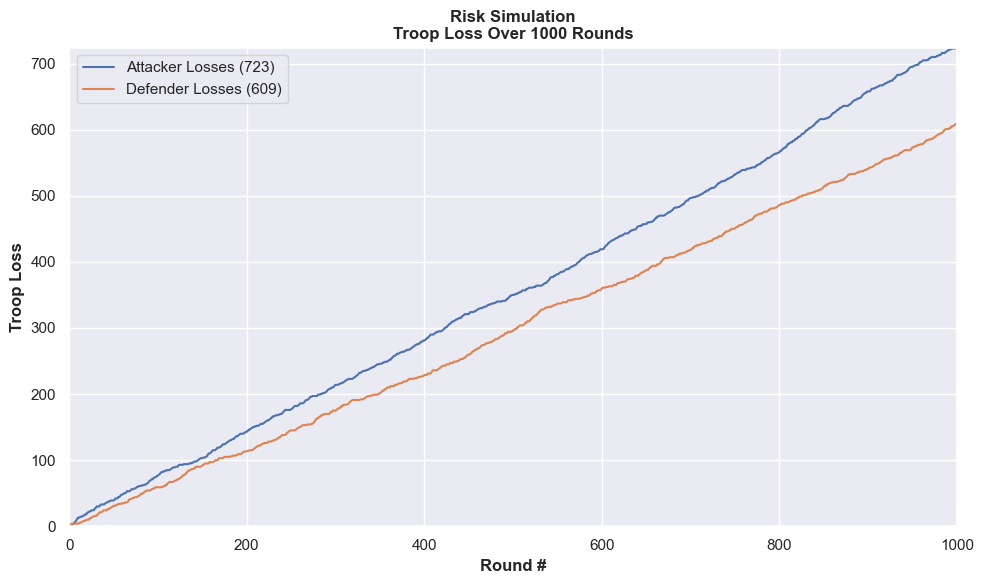

In [262]:
# create the plot
plt.figure(figsize=(10, 6))

# plot attack and defend loss over rounds
plt.plot(round, attack_losses, label=f"Attacker Losses ({attack_loss_total})")
plt.plot(round, defend_losses, label=f"Defender Losses ({defend_loss_total})")

# add labels and title
plt.xlabel("Round #", weight='bold')
plt.ylabel("Troop Loss", weight='bold')
plt.title("Risk Simulation\nTroop Loss Over 1000 Rounds", weight='bold')
plt.legend()

# define plot boundaries to tighten and tidy
plt.xlim(0, 1000)
plt.ylim(0, max(max(attack_losses), max(defend_losses)) + 1)  # Set y-axis to go from 0 to the max loss plus 1

# show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

I'd also like to use my outcomes dictionary to see how frequently each possible outcome occurs. I'll create a piechart to show the distribution.

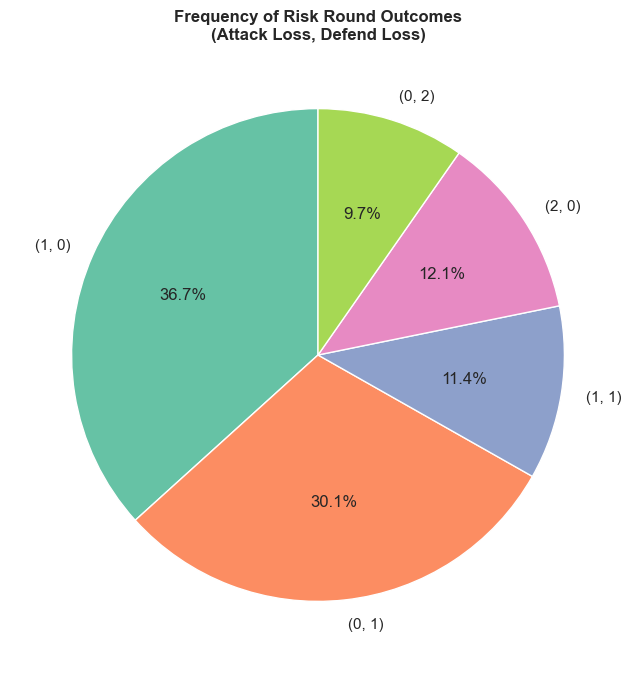

In [263]:
# assign labels and sizes based on key:value pairs for outcomes
labels = [f"{outcome}" for outcome in outcomes.keys()]
sizes = [count for count in outcomes.values()]

# plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=sns.color_palette('Set2'), autopct='%1.1f%%', startangle=90)
plt.title("Frequency of Risk Round Outcomes\n(Attack Loss, Defend Loss)", weight='bold')

# display the plot
plt.show()

This was an engaging exercise, and I could see some practical utility in using this data to determine an effective Risk strategy.

For example, if I'm a Defender and an Attacker chooses to roll two dice, am I better off choosing two or one? What approach minimises troop losses over the long term? Digging into this data further would shed a lot of light on various play scenarios.